#### This dataset contains details of 1000 customers who intend to buy a car, considering their annual salaries.

* Columns:
* User ID
* Gender
* Age
* Annual Salary
* Purchase Decision (No = 0; Yes = 1)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('car_purchase.xls')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
df.shape

(1000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [6]:
df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

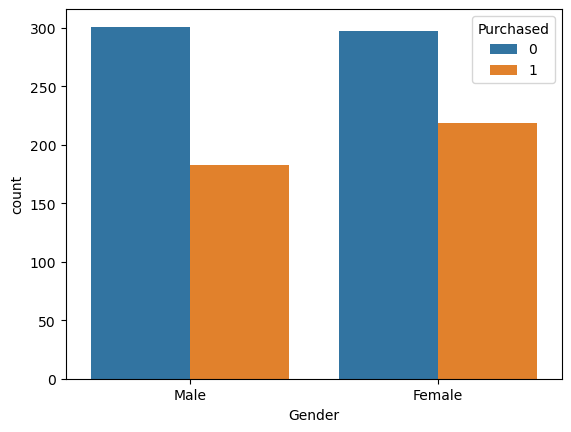

In [7]:
sns.countplot(data=df, x='Gender',hue='Purchased')

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

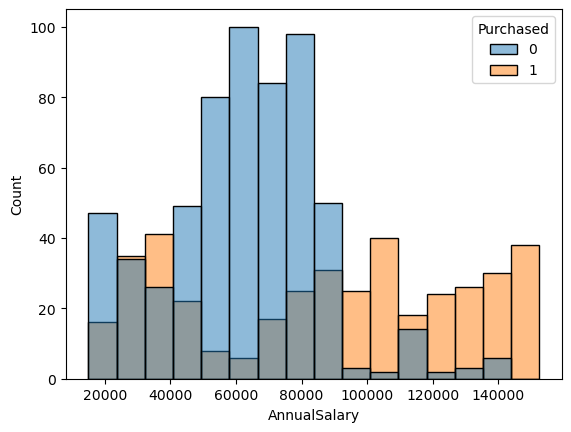

In [8]:
sns.histplot(data=df, x='AnnualSalary', hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Count'>

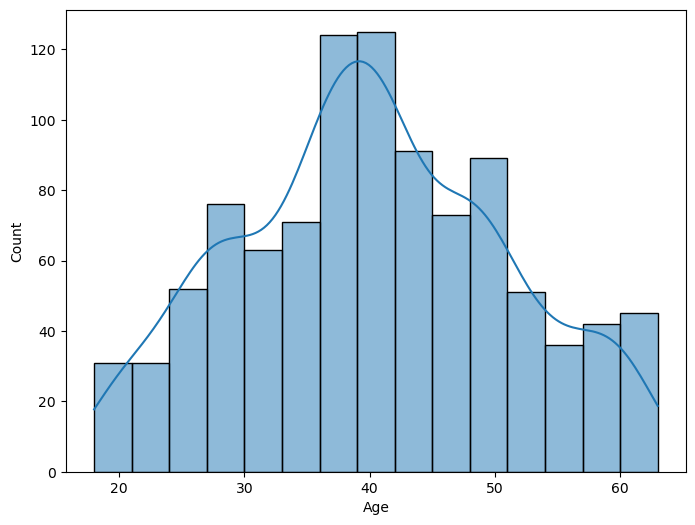

In [9]:
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = 'Age', kde = True)

#### Age distribution is very similar to our bell-curve.

<AxesSubplot:>

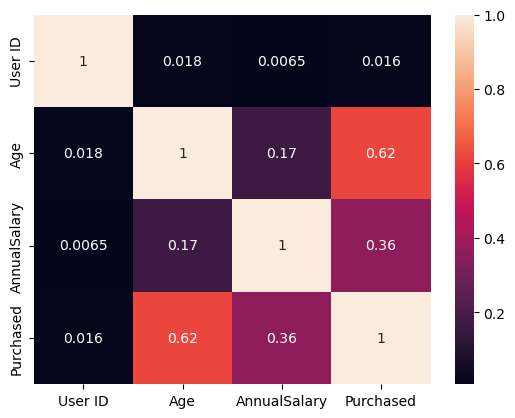

In [10]:
sns.heatmap(df.corr(), annot=True)

#### Some conclusions

* In general, women have the highest salary in the sample, but they are also older (which may indicate that they are more advanced in their careers)
* People with higher salaries tend to buy more
* In the sample, there is some correlation between age and the decision to buy

In [41]:
categorical = ["Gender"] # "Gender" is our only categorical feature

In [42]:
df_final = pd.get_dummies(df, columns = categorical, drop_first = True)

In [43]:
df_final

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1
...,...,...,...,...,...
995,863,38,59000,0,1
996,800,47,23500,0,0
997,407,28,138500,1,0
998,299,48,134000,1,0


In [44]:
df_final = df_final.drop('User ID', axis = 1) # The ID column is not important

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_final.drop('Purchased', axis=1)
y = df_final['Purchased']
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 42)

### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

### Testing

In [51]:
predictions = dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.88      0.82      0.85       128

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



[[157  15]
 [ 23 105]]


#### Some conclusions

* We have good f1-scores for both categories (0 and 1)
* We should try to improve the 87% accuracy